In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the tickers
tickers = ["GOOGL", "META"]

# Define the time period
start_date = "2023-01-01"
end_date = "2024-03-01"

# Download historical market data
data = yf.download(tickers, start=start_date, end=end_date)


[*********************100%%**********************]  2 of 2 completed


In [23]:
# print(type(data), "\n", type(data["Close"]['GOOGL']))
# https://www.macrotrends.net/stocks/charts/GOOGL/alphabet/shares-outstanding
googl_outstanding_shares = 12.488 * 10**9
# https://www.macrotrends.net/stocks/charts/META/meta-platforms/shares-outstanding
meta_outstanding_shares = 2.566 * 10**9

print(data.head())

np_arrays = data.to_numpy()

# Calculate the market cap ratio
ratio = data["Close"]['GOOGL'] * googl_outstanding_shares / (data["Close"]['META'] * meta_outstanding_shares)

print("=====================================")

print(ratio.head())

print(ratio.index[0].date(), ratio.iloc[0])

print(ratio.index[-1].date(), ratio.iloc[-1])


# print(np_arrays)
# data["Marketcap"] = pd.DataFrame(index=data.index)
# data["Marketcap"]["GOOGL"]= data["Close"]["GOOGL"] * googl_outstanding_shares
# data["Marketcap"]["META"] = data["Close"]["META"] * meta_outstanding_shares
# data.head()

# print(type(data["Close"]["META"]["date"]))


            Adj Close                  Close                   High  \
                GOOGL        META      GOOGL        META      GOOGL   
Date                                                                  
2023-01-03  89.120003  124.607788  89.120003  124.739998  91.050003   
2023-01-04  88.080002  127.235008  88.080002  127.370003  90.650002   
2023-01-05  86.199997  126.805458  86.199997  126.940002  87.570000   
2023-01-06  87.339996  129.882202  87.339996  130.020004  87.690002   
2023-01-09  88.019997  129.332779  88.019997  129.470001  90.050003   

                              Low                   Open              \
                  META      GOOGL        META      GOOGL        META   
Date                                                                   
2023-01-03  126.370003  88.519997  122.279999  89.589996  122.820000   
2023-01-04  129.050003  87.269997  125.849998  90.349998  127.379997   
2023-01-05  128.520004  85.900002  124.540001  87.470001  126.129997   

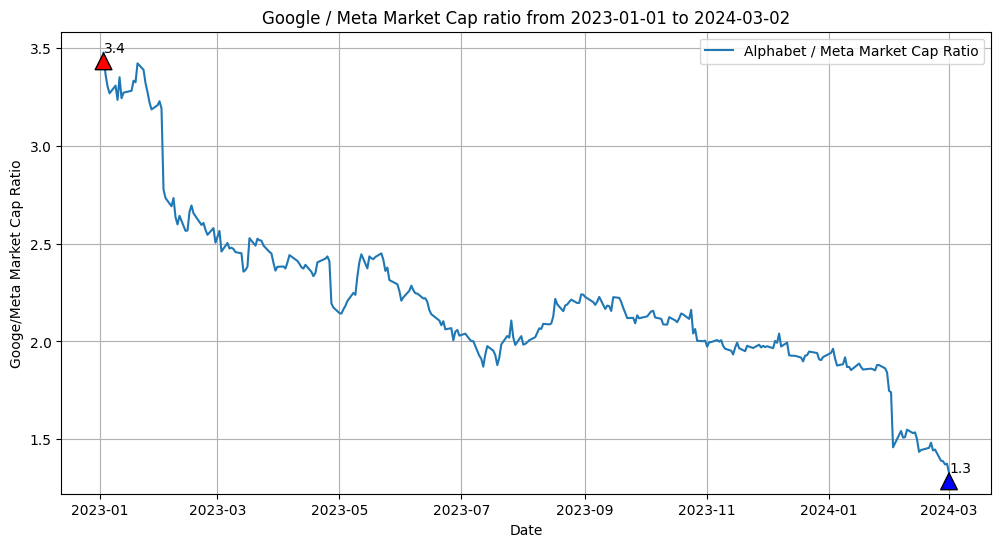

In [31]:
# Plot the ratio
plt.figure(figsize=(12, 6))
plt.plot(ratio, label='Alphabet / Meta Market Cap Ratio')
plt.title('Google / Meta Market Cap ratio from ' + start_date + ' to ' + end_date)
plt.xlabel('Date')
plt.ylabel('Googe/Meta Market Cap Ratio')
plt.legend()
plt.grid(True)
plt.annotate(str(ratio.iloc[0])[:3], xy=(ratio.index[0].date(), ratio.iloc[0]),
             arrowprops=dict(facecolor='red', shrink=0.1))

plt.annotate(str(ratio.iloc[-1])[:3], xy=(ratio.index[-1].date(), ratio.iloc[-1]),
             arrowprops=dict(facecolor='blue', shrink=0.1))
plt.show()